In [0]:
import tensorflow as tf
from tensorflow import keras

#IMPORT FROM NOTEBOOK

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [4]:
!pip install import-ipynb

In [5]:
import import_ipynb
import MRNet_models_processing as processing

importing Jupyter notebook from MRNet_models_processing.ipynb
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Using TensorFlow backend.


unzip:  cannot find or open /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip, /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.zip or /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.ZIP.


### **VGG base model**

In [0]:
# base model for VGG16
def VGG16_model():
  model_VGG = keras.models.Sequential()
  model_VGG.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape = (256,256,3)))   #0
  model_VGG.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))   #1
  model_VGG.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))  #2  

  model_VGG.add(keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))   #3
  model_VGG.add(keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))   #4
  
  model_VGG.add(keras.layers.Dropout(0.5)) 
  
  model_VGG.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))  #5

  

  model_VGG.add(keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))  #6
  model_VGG.add(keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))  #7
  model_VGG.add(keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))  #8
  model_VGG.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))  #9

  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  #10
  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  #11
  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  #12

  model_VGG.add(keras.layers.Dropout(0.5))
  
  model_VGG.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))  #13

   

  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  #14
  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  #15
  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  #16
  model_VGG.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))  #17

  # full model just test first sol
  model_VGG.add(keras.layers.Flatten())  #18
  model_VGG.add(keras.layers.Dense(units=4096 , activation = 'relu'))  #19
  model_VGG.add(keras.layers.Dropout(0.5))
  model_VGG.add(keras.layers.Dense(units=4096 , activation = 'relu'))  #20
  model_VGG.add(keras.layers.Dropout(0.5))
  model_VGG.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))  #21
  
  model_VGG.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4) ,metrics=['acc']) 

  return model_VGG

In [0]:
VGG16_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0

# pop layers

In [0]:
def pop_layers(model:keras.Model):
  for i in range(6):
    model.pop()
    
  return model  

### **BINARY CLASSIFIER**

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=4096 , activation = 'relu' , input_dim = 512 ))
  binary_class.add(keras.layers.Dense(units=4096 , activation = 'relu'))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(lr=1e-4),metrics=['acc'])
  return binary_class

In [0]:
binary_classifier().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4096)              2101248   
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4097      
Total params: 18,886,657
Trainable params: 18,886,657
Non-trainable params: 0
_________________________________________________________________


#Training Extractor

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.2311 - acc: 0.7719
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 36s 709ms/step - loss: 1.2311 - acc: 0.7719 - val_loss: 0.6815 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4728 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 233ms/step - loss: 0.4728 - acc: 0.8083 - val_loss: 0.6555 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4685 - acc: 0.8053
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 232ms/step - loss: 0.4685 - acc: 0.8053 - val_loss: 0.6784 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4550 - acc: 0.8083
Epoch 00004: val_acc did not improve from 0.8

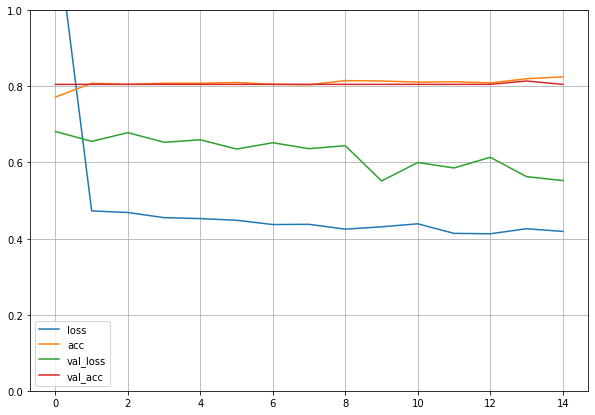

In [0]:
# with many dropouts
model1 = VGG16_model()
train_extractor(model1,data.vgg,data.axial,data.abnormal) 

In [0]:
model_temp =  load_model(data.vgg,data.axial,data.abnormal,data.extractor)
list1 = test_extractor(model_temp,data.axial,data.abnormal)

4/4 [==============================] - 1s 210ms/step - loss: 1.9590 - acc: 0.8000


Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.8053 - acc: 0.6942
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 35s 688ms/step - loss: 1.8053 - acc: 0.6942 - val_loss: 0.5646 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 1.4342 - acc: 0.6903
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 230ms/step - loss: 1.4342 - acc: 0.6903 - val_loss: 0.5640 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 1.3074 - acc: 0.7089
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 230ms/step - loss: 1.3074 - acc: 0.7089 - val_loss: 0.5606 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 1.1781 - acc: 0.7355
Epoch 00004: val_acc did not improve from 0.8

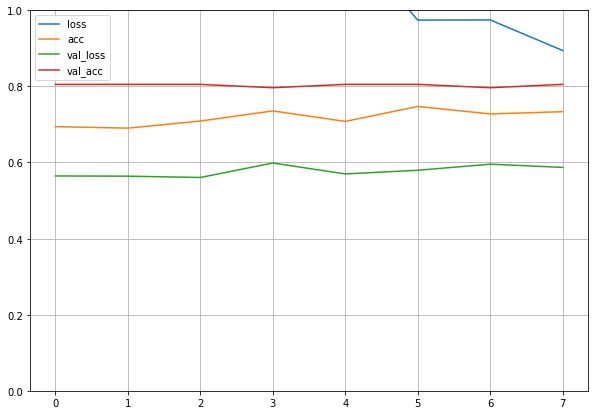

In [0]:
# lr = 10^-6
model4 = VGG16_model()                                    
train_extractor(model4,data.vgg,data.axial,data.abnormal) 

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.6391 - acc: 0.8004
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 37s 717ms/step - loss: 0.6391 - acc: 0.8004 - val_loss: 0.6094 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4895 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 227ms/step - loss: 0.4895 - acc: 0.8083 - val_loss: 0.5291 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4656 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 227ms/step - loss: 0.4656 - acc: 0.8083 - val_loss: 0.5031 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4524 - acc: 0.8083
Epoch 00004: val_acc did not improve from 0.8

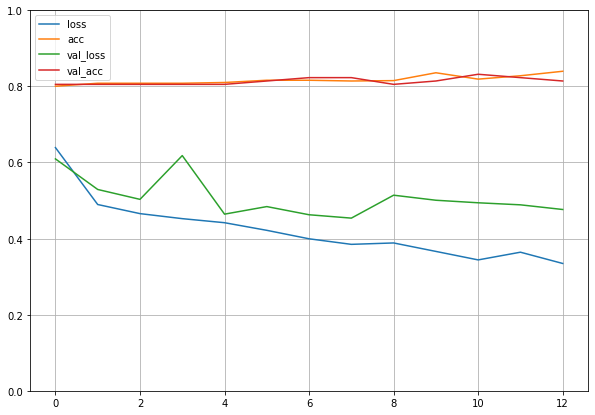

In [0]:
#remove some dropouts and lr = 10^-4    # best till now
model12 = VGG16_model()
train_extractor(model12,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.7644 - acc: 0.7945
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 33s 642ms/step - loss: 0.7644 - acc: 0.7945 - val_loss: 0.6042 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4809 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 227ms/step - loss: 0.4809 - acc: 0.8083 - val_loss: 0.6170 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4703 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 227ms/step - loss: 0.4703 - acc: 0.8083 - val_loss: 0.5829 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4563 - acc: 0.8083
Epoch 00004: val_acc did not improve from 0.8

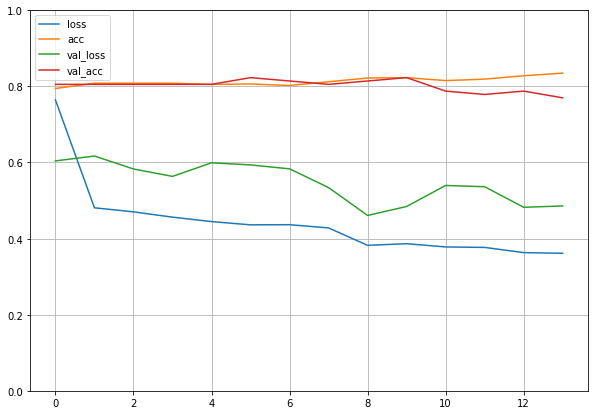

In [0]:
# add dropout layer
model14 = VGG16_model()
train_extractor(model14,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.6653 - acc: 0.7237
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 36s 708ms/step - loss: 1.6653 - acc: 0.7237 - val_loss: 0.6329 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.9078 - acc: 0.7237
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 230ms/step - loss: 0.9078 - acc: 0.7237 - val_loss: 0.6676 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.6673 - acc: 0.7375
Epoch 00003: val_acc improved from 0.80531 to 0.81416, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 36s 696ms/step - loss: 0.6673 - acc: 0.7375 - val_loss: 0.6627 - val_acc: 0.8142
Epoch 4/50
51/51 [==============================

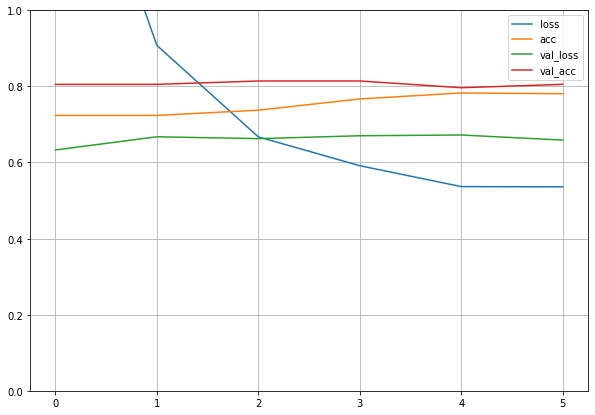

In [0]:
# decrease learning rate and set all dropout layers
model13 = VGG16_model()
train_extractor(model13,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 84.8062 - acc: 0.8004
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 87s 2s/step - loss: 84.8062 - acc: 0.8004 - val_loss: 58.1780 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 42.2052 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 241ms/step - loss: 42.2052 - acc: 0.8083 - val_loss: 29.4401 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 22.0209 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 241ms/step - loss: 22.0209 - acc: 0.8083 - val_loss: 16.0686 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 12.4238 - acc: 0.8083
Epoch 00004: val_acc did not improve f

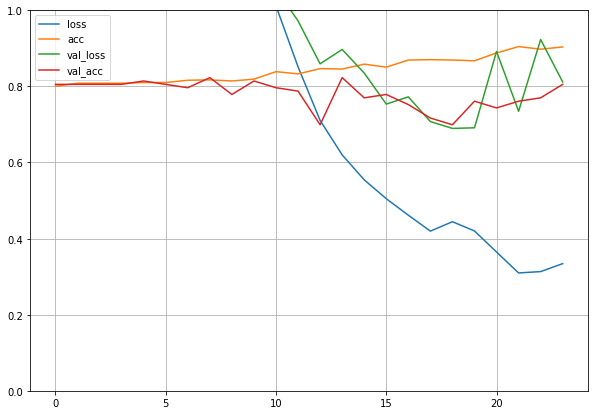

In [0]:
#kernel regulaizer 0.01
model15 = VGG16_model()
train_extractor(model15,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 10.6266 - acc: 0.7915
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 35s 682ms/step - loss: 10.6266 - acc: 0.7915 - val_loss: 9.3559 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 8.3546 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 241ms/step - loss: 8.3546 - acc: 0.8083 - val_loss: 7.6925 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 7.0095 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 242ms/step - loss: 7.0095 - acc: 0.8083 - val_loss: 6.5902 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 6.0653 - acc: 0.8102
Epoch 00004: val_acc improved from 0.80531 

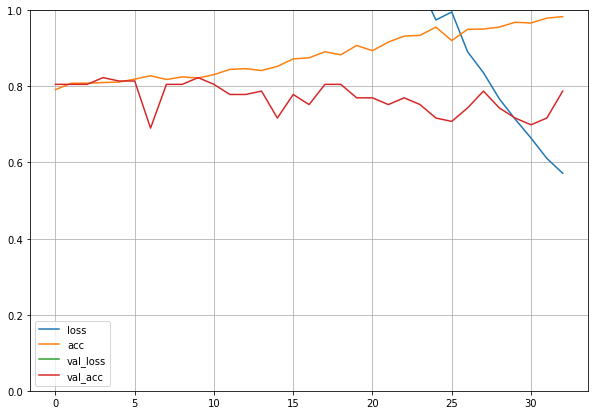

In [0]:
#kernel regulaizer 0.001
model16 = VGG16_model()
train_extractor(model16,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.6518 - acc: 0.8014
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 33s 656ms/step - loss: 1.6518 - acc: 0.8014 - val_loss: 1.6074 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 1.4275 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 241ms/step - loss: 1.4275 - acc: 0.8083 - val_loss: 1.4952 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 1.3027 - acc: 0.8083
Epoch 00003: val_acc improved from 0.80531 to 0.81416, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 42s 832ms/step - loss: 1.3027 - acc: 0.8083 - val_loss: 1.3050 - val_acc: 0.8142
Epoch 4/50
51/51 [==============================

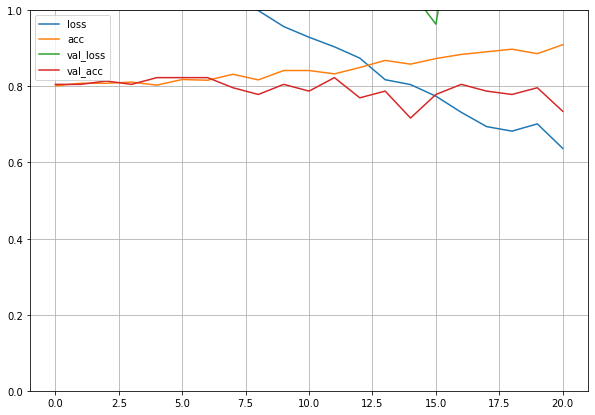

In [0]:
#kernel regulaizer 0.0001
model17 = VGG16_model()
train_extractor(model17,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 9.8374 - acc: 0.8083
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 37s 718ms/step - loss: 9.8374 - acc: 0.8083 - val_loss: 7.7609 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 6.5448 - acc: 0.8073
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 240ms/step - loss: 6.5448 - acc: 0.8073 - val_loss: 5.5070 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 4.7755 - acc: 0.8210
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 240ms/step - loss: 4.7755 - acc: 0.8210 - val_loss: 4.2539 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 3.8007 - acc: 0.8112
Epoch 00004: val_acc improved from 0.80531 to

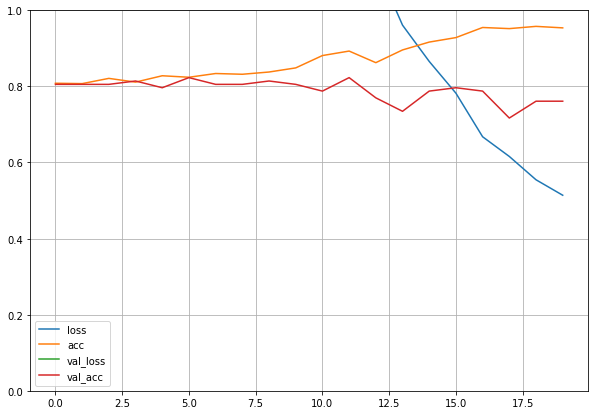

In [0]:
#kernel regulaizer 0.001 and remove all dropouts
model18 = VGG16_model()
train_extractor(model18,data.vgg,data.axial,data.abnormal)

# Axial Abnormal 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.5522 - acc: 0.8053
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 51s 994ms/step - loss: 0.5522 - acc: 0.8053 - val_loss: 0.5065 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4870 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 22s 423ms/step - loss: 0.4870 - acc: 0.8083 - val_loss: 0.4894 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4667 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 20s 392ms/step - loss: 0.4667 - acc: 0.8083 - val_loss: 0.4670 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0

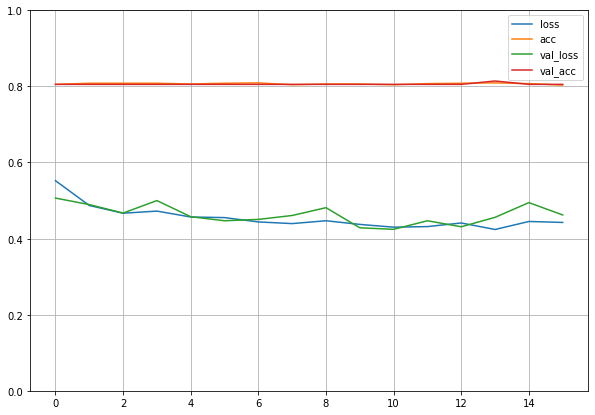

In [8]:
#same as model 12 but with data augmentation
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.axial,processing.abnormal)

In [10]:
model_temp1 =processing.load_model(processing.vgg,processing.axial,processing.abnormal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.axial,processing.abnormal)

4/4 [==============================] - 0s 69ms/step - loss: 0.4485 - acc: 0.8000


##Normalization

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.5255 - acc: 0.8043
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 38s 754ms/step - loss: 0.5255 - acc: 0.8043 - val_loss: 0.5031 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4616 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 21s 417ms/step - loss: 0.4616 - acc: 0.8083 - val_loss: 0.4823 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4514 - acc: 0.8073
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 20s 384ms/step - loss: 0.4514 - acc: 0.8073 - val_loss: 0.4572 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4463 - acc: 0.8043
Epoch 00004: val_acc did not improve from 0.8

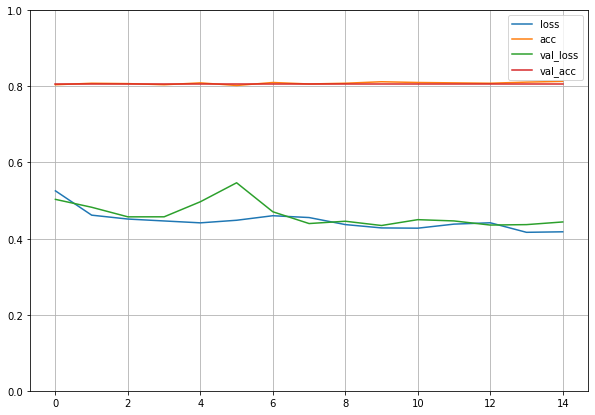

In [0]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.axial,processing.abnormal)

In [0]:
model_temp1 =processing.load_model(processing.vgg,processing.axial,processing.abnormal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.axial,processing.abnormal)

4/4 [==============================] - 0s 87ms/step - loss: 0.5059 - acc: 0.7917


#Axial ACL

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.5007 - acc: 0.8092
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_acl.h5
51/51 [==============================] - 89s 2s/step - loss: 0.5007 - acc: 0.8092 - val_loss: 0.5919 - val_acc: 0.8496
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4914 - acc: 0.8122
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 20s 400ms/step - loss: 0.4914 - acc: 0.8122 - val_loss: 0.4809 - val_acc: 0.8496
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4881 - acc: 0.8122
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 21s 414ms/step - loss: 0.4881 - acc: 0.8122 - val_loss: 0.4226 - val_acc: 0.8496
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4775 - acc: 0.8112
Epoch 00004: val_acc did not improve from 0.84956
51/

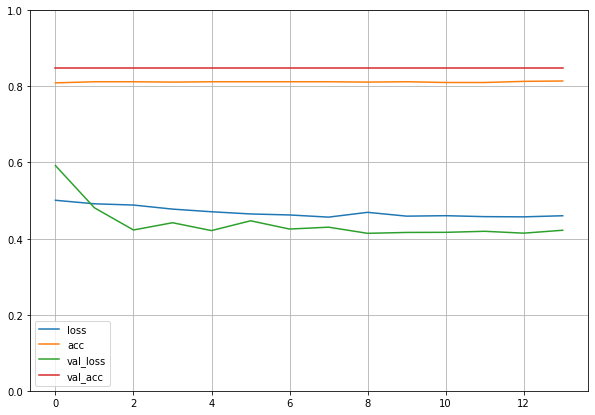

In [11]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.axial,processing.acl)

In [13]:
model_temp2 =processing.load_model(processing.vgg,processing.axial,processing.acl,processing.extractor)
list1 = processing.test_extractor(model_temp2,processing.axial,processing.acl)

4/4 [==============================] - 0s 70ms/step - loss: 0.6850 - acc: 0.5500


# Axial Meniscal

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.6556 - acc: 0.6441
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_meniscus.h5
51/51 [==============================] - 93s 2s/step - loss: 0.6556 - acc: 0.6441 - val_loss: 0.6314 - val_acc: 0.6637
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.6434 - acc: 0.6401
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 21s 409ms/step - loss: 0.6434 - acc: 0.6401 - val_loss: 0.6489 - val_acc: 0.6637
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.6335 - acc: 0.6401
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 20s 396ms/step - loss: 0.6335 - acc: 0.6401 - val_loss: 0.6230 - val_acc: 0.6637
Epoch 4/50
51/51 [==============================] - ETA: 0s -

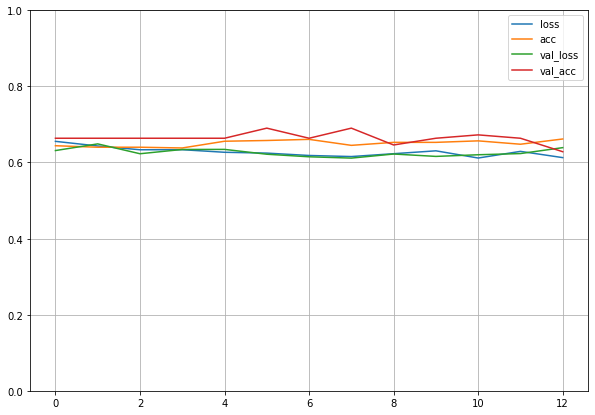

In [7]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.axial,processing.meniscal)

In [8]:
model_temp1 =processing.load_model(processing.vgg,processing.axial,processing.meniscal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.axial,processing.meniscal)

4/4 [==============================] - 1s 224ms/step - loss: 0.6574 - acc: 0.6000


# Saggital Abnormal

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.5501 - acc: 0.8024
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/sagittal_abnormal.h5
51/51 [==============================] - 40s 785ms/step - loss: 0.5501 - acc: 0.8024 - val_loss: 0.5028 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4939 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 21s 418ms/step - loss: 0.4939 - acc: 0.8083 - val_loss: 0.5237 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4884 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 22s 440ms/step - loss: 0.4884 - acc: 0.8083 - val_loss: 0.4987 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4854 - acc: 0.8083
Epoch 00004: val_acc did not improve from 

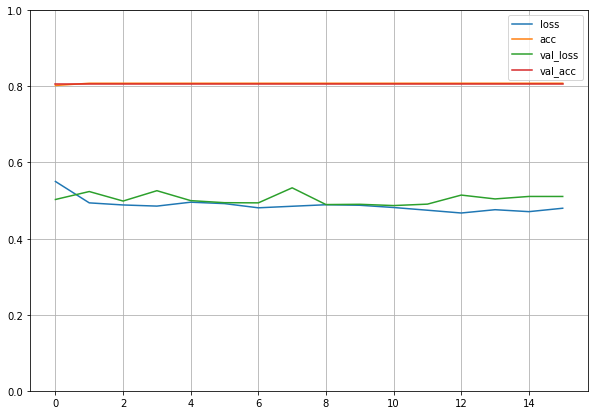

In [17]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.sagittal,processing.abnormal)

In [18]:
model_temp1 =processing.load_model(processing.vgg,processing.sagittal,processing.abnormal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.sagittal,processing.abnormal)

4/4 [==============================] - 0s 71ms/step - loss: 0.5176 - acc: 0.7917


#Saggital ACL

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.5244 - acc: 0.8092
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16/Extractor/sagittal_acl.h5
51/51 [==============================] - 40s 790ms/step - loss: 0.5244 - acc: 0.8092 - val_loss: 0.4249 - val_acc: 0.8496
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4928 - acc: 0.8122
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 22s 441ms/step - loss: 0.4928 - acc: 0.8122 - val_loss: 0.4299 - val_acc: 0.8496
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4844 - acc: 0.8122
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 19s 374ms/step - loss: 0.4844 - acc: 0.8122 - val_loss: 0.4394 - val_acc: 0.8496
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4877 - acc: 0.8122
Epoch 00004: val_acc did not improve from 0.849

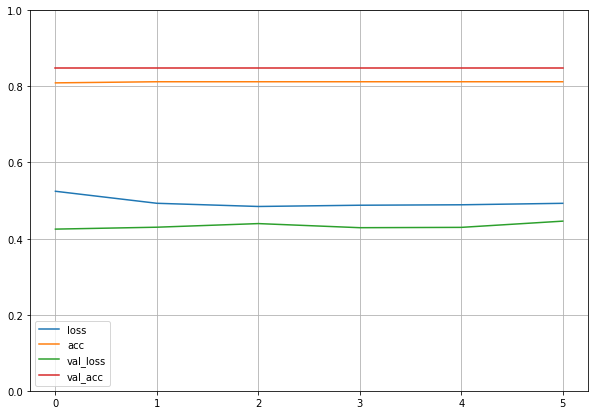

In [19]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.sagittal,processing.acl)

In [20]:
model_temp1 =processing.load_model(processing.vgg,processing.sagittal,processing.acl,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.sagittal,processing.acl)

4/4 [==============================] - 0s 89ms/step - loss: 0.9006 - acc: 0.5500


#Saggital Meniscal

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.6623 - acc: 0.6450
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16/Extractor/sagittal_meniscus.h5
51/51 [==============================] - 39s 757ms/step - loss: 0.6623 - acc: 0.6450 - val_loss: 0.6484 - val_acc: 0.6637
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.6561 - acc: 0.6470
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 22s 426ms/step - loss: 0.6561 - acc: 0.6470 - val_loss: 0.6386 - val_acc: 0.6637
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.6542 - acc: 0.6470
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 20s 384ms/step - loss: 0.6542 - acc: 0.6470 - val_loss: 0.6418 - val_acc: 0.6637
Epoch 4/50
51/51 [==============================] - ETA

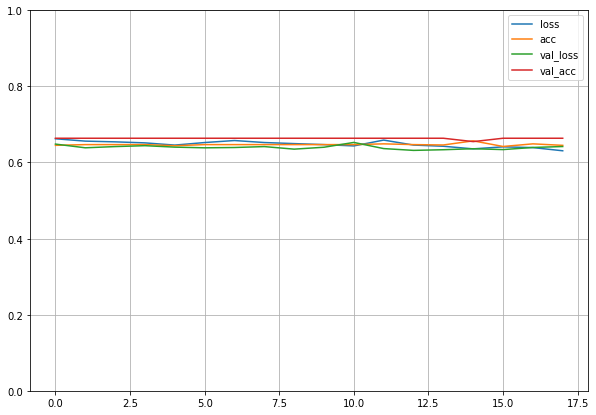

In [7]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.sagittal,processing.meniscal)

In [8]:
model_temp1 =processing.load_model(processing.vgg,processing.sagittal,processing.meniscal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.sagittal,processing.meniscal)

4/4 [==============================] - 1s 224ms/step - loss: 0.6857 - acc: 0.5667


#Coronal Abnormal

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.5357 - acc: 0.8033
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/coronal_abnormal.h5
51/51 [==============================] - 39s 774ms/step - loss: 0.5357 - acc: 0.8033 - val_loss: 0.4936 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4992 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 22s 433ms/step - loss: 0.4992 - acc: 0.8083 - val_loss: 0.4930 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.5025 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 22s 440ms/step - loss: 0.5025 - acc: 0.8083 - val_loss: 0.4929 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4948 - acc: 0.8083
Epoch 00004: val_acc did not improve from 0

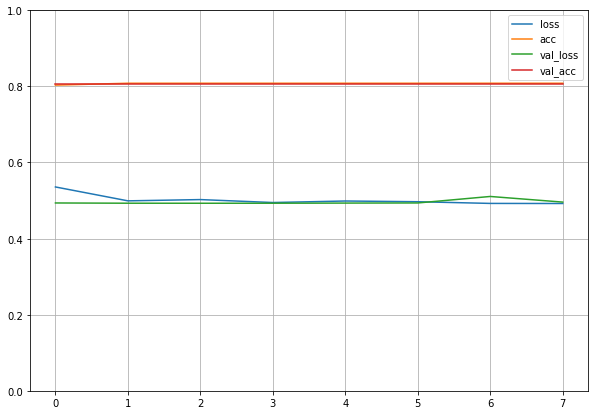

In [9]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.coronal,processing.abnormal)

In [10]:
model_temp1 =processing.load_model(processing.vgg,processing.coronal,processing.abnormal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.coronal,processing.abnormal)

4/4 [==============================] - 0s 75ms/step - loss: 0.5114 - acc: 0.7917


#Coronal ACL

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.5409 - acc: 0.8024
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16/Extractor/coronal_acl.h5
51/51 [==============================] - 41s 795ms/step - loss: 0.5409 - acc: 0.8024 - val_loss: 0.4422 - val_acc: 0.8496
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4878 - acc: 0.8122
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 22s 428ms/step - loss: 0.4878 - acc: 0.8122 - val_loss: 0.4304 - val_acc: 0.8496
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4918 - acc: 0.8122
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 20s 392ms/step - loss: 0.4918 - acc: 0.8122 - val_loss: 0.4327 - val_acc: 0.8496
Epoch 4/50
51/51 [==============================] - ETA: 0s -

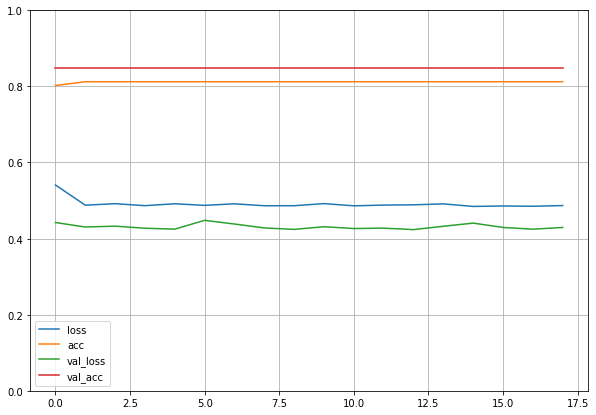

In [8]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.coronal,processing.acl)

In [9]:
model_temp1 =processing.load_model(processing.vgg,processing.coronal,processing.acl,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.coronal,processing.acl)

4/4 [==============================] - 1s 225ms/step - loss: 0.8089 - acc: 0.5500


# Coronal Meniscal

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.6653 - acc: 0.6391
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16/Extractor/coronal_meniscus.h5
51/51 [==============================] - 39s 764ms/step - loss: 0.6653 - acc: 0.6391 - val_loss: 0.6428 - val_acc: 0.6637
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.6565 - acc: 0.6470
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 21s 413ms/step - loss: 0.6565 - acc: 0.6470 - val_loss: 0.6391 - val_acc: 0.6637
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.6503 - acc: 0.6470
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 22s 436ms/step - loss: 0.6503 - acc: 0.6470 - val_loss: 0.6516 - val_acc: 0.6637
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.6533 - acc: 0.6470
Epoch 00004: val_acc did not improve from 0

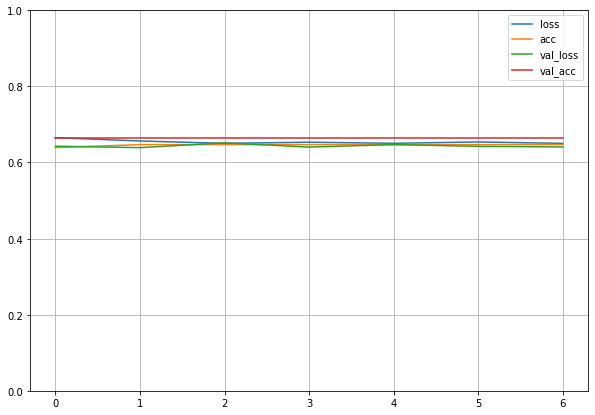

In [10]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.coronal,processing.meniscal)

In [11]:
model_temp1 =processing.load_model(processing.vgg,processing.coronal,processing.meniscal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.coronal,processing.meniscal)

4/4 [==============================] - 0s 70ms/step - loss: 0.6905 - acc: 0.5667
